In [1]:
%matplotlib inline
#%matplotlib notebook
#%matplotlib widget
import matplotlib 
import numpy as np
import pandas as pd
#import ipywidgets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
 
# use LaTeX, choose nice some looking fonts and tweak some settings
matplotlib.rc('font', family='serif')
matplotlib.rc('font', size=16)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('legend', handlelength=1.5)
matplotlib.rc('legend', frameon=False)
matplotlib.rc('xtick.major', pad=7)
matplotlib.rc('xtick.minor', pad=7)
matplotlib.rc('text', usetex=True)
# matplotlib.rc('text.latex', 
#               preamble=[r'\usepackage[T1]{fontenc}',
#                         r'\usepackage{amsmath}',
#                         r'\usepackage{txfonts}',
#                         r'\usepackage{textcomp}'])

matplotlib.rc('figure', figsize=(12, 9))

In [149]:
def gaussian(xarr, c, sig, ar):
    return ar/(sig*np.sqrt(2.0*np.pi))*np.exp(-(xarr-c)**2/(2.0*sig*sig))

c0 = np.array([20.0, 30.0, 45.0, 53.0, 61.0, 75.0, 85.0, 100.0, 108.0, 116.0, 130.])
cc = (c0-15.0)*180./55.
sigma = np.array([3.0, 3.0, 1.7, 1.7, 1.7, 3.0, 3.0, 1.7, 1.7, 1.7, 3.0])*3
area = np.array([500, 500, 325, 325, 325, 500, 500, 325, 325, 325, 500])*0.7

bins=np.linspace(0.0, 361, 360)
xx = 0.5*(bins[1:]+bins[:-1])
datatot = []
gaussdata = np.zeros(xx.shape)

for ind, c0 in enumerate(cc):
    datatot.append(np.random.normal(cc[ind], sigma[ind], int(area[ind])))
    gaussdata+=gaussian(xx, cc[ind], sigma[ind], float(area[ind]))

datatot.append(np.random.random(500)*360)

stot = np.concatenate(datatot)

count, bins = np.histogram(stot, bins ) 

zz = 2.0*np.sqrt(count)

In [150]:
def nlm(xdata, ydata, Nneighbor=3, h=10.0**(-0.8)):
    y0 = ydata[:]
    y1 = np.concatenate([y0[-Nneighbor:], ydata])
    y2 = np.concatenate([y1, y0[:Nneighbor]])
    newy = np.zeros(y2.shape)
    for ind, yy in enumerate(y2):
        if ind < Nneighbor :
            pass
        elif ind > newy.shape[0]-Nneighbor :
            pass
        else :
            bl = (y2[ind-Nneighbor: ind+Nneighbor+1])**2/4.0
            ny = np.exp(-np.abs(bl-yy**2/4.0)**2/h)
            #print(bl, ny)
            newy[ind] = ((ny*bl).sum(0))/(ny.sum(0))
    return 2.0*np.sqrt(newy[Nneighbor:-Nneighbor])


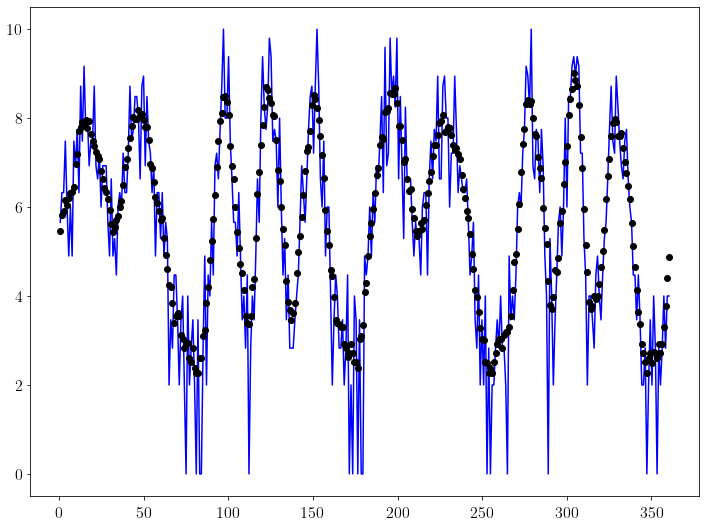

In [170]:
#plt.errorbar(xx, count, np.sqrt(count), fmt='bo')
#plt.plot(xx, gaussdata, "r-", lw=4)
nny =nlm(xx, zz, 3, 1000)
nny.shape
plt.plot(xx, zz, 'b-')
plt.plot(xx, nny, "ko")
#plt.xlim(50, 100)

In [139]:
10**(-0.8)

0.15848931924611134